# Pose Worlds

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import time
import numpy as np
from matplotlib import pyplot as plt

from environments.gridworlds.gridworld import *
from environments.gridworlds.gridactions import *
from environments.gridworlds.gridworlds_classic import *
from environments.poseworlds.poseworlds_classic import *
from environments.euclideanworld.euclideanworlds import *
from plots.gridworlds.poseworld_visualizer import *
from plots.gridworlds.gridworld_visualizer import *
from plots.gridworlds.gridworld_animator import GridWorldAnimator

from agents.pgp.pgp_softmax import SoftMaxPGP
from plots.agent_plotter import AgentPlotter
from utils.policy_functions import *



In [33]:
alpha_train = 0.05
n_train_steps = 5000
n_train_plots = 4
n_frames = 200

suffix = "_raw"

In [34]:
# alloworld =  ForkedRoomEuclideGridWorld(actions=BasicActionSet())
# idioworld =  ForkedRoomEuclidePoseWorld(actions=PoseActionSet(), no=4)

alloworld =  OneDoorEuclideGridWorld(actions=KingActionSet(), name="tworooms")
idioworld =  OneDoorEuclidePoseWorld(actions=TurningActionSet(), no=8, name="tworooms")

In [35]:
allo_uni_bot = SoftMaxPGP(alloworld, gamma=0.999, p0_func=p0_onehot, theta0_func=theta0_uniform, name="PGP allothetic | π0 uni")
idio_uni_bot = SoftMaxPGP(idioworld, gamma=0.999, p0_func=p0_onehot, theta0_func=theta0_uniform, name="PGP idiothetic | π0 uni")
idio_bia_bot = SoftMaxPGP(idioworld, gamma=0.999, p0_func=p0_onehot, theta0_func=theta0_biased, name="PGP idiothetic | π0 bias")

v_allo_uni = GridWorldVisualizer(alloworld, allo_uni_bot)
v_idio_uni = PoseWorldVisualizer(idioworld, idio_uni_bot)
v_idio_bia = PoseWorldVisualizer(idioworld, idio_bia_bot)

vs = [v_allo_uni,v_idio_uni, v_idio_bia]
p = AgentPlotter([allo_uni_bot, idio_uni_bot,idio_bia_bot])

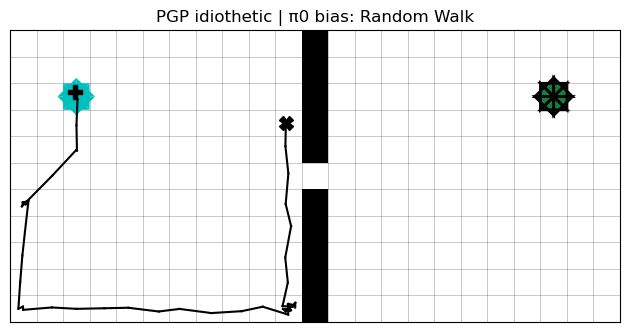

In [36]:
for v in vs:
    v.plot_trajectory(plot_maze=True, plot_axis=False, n_steps=50)
    plt.title("{}: Random Walk".format(v.agent.name))
    plt.tight_layout()
    plt.show()

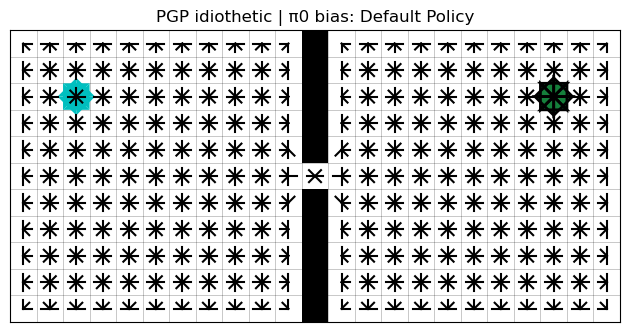

In [37]:
for v in vs:
    v.plot_policy(plot_maze=True, plot_axis=False)
    plt.title("{}: Default Policy".format(v.agent.name))
    plt.tight_layout()
    plt.show()

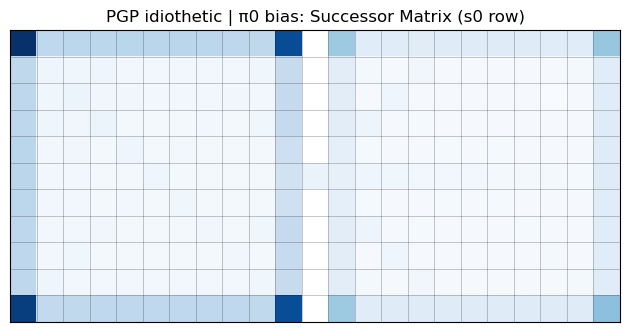

In [38]:
for v in vs:
    v.plot_successor_matrix(plot_axis=False)
    plt.title("{}: Successor Matrix (s0 row)".format(v.agent.name))
    plt.tight_layout()
    plt.show()

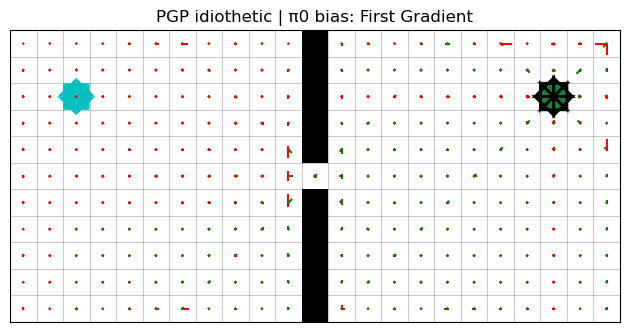

In [39]:
for v in vs:
    v.plot_gradient(plot_maze=True, plot_axis=False)
    plt.title("{}: First Gradient".format(v.agent.name))
    plt.tight_layout()
    plt.show()

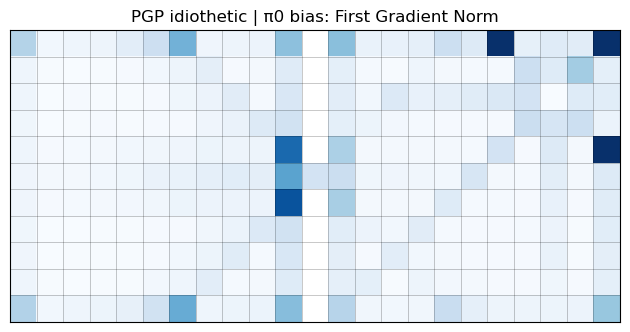

In [40]:
for v in vs:
    v.plot_gradient_norm(plot_axis=False)
    plt.title("{}: First Gradient Norm".format(v.agent.name))
    plt.tight_layout()
    plt.show()

 Epoch #0 training 0/5000, 


100%|██████████| 1250/1250 [05:48<00:00,  3.59it/s]


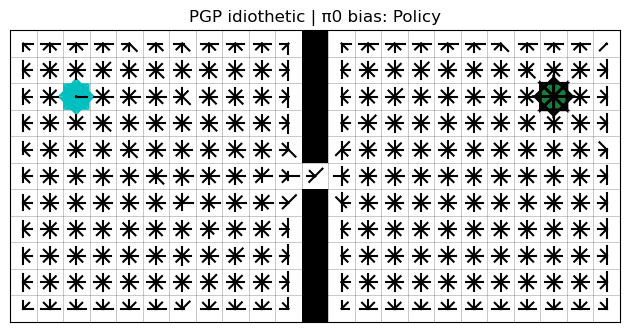

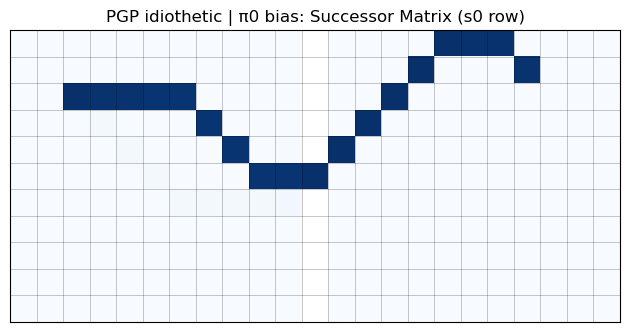

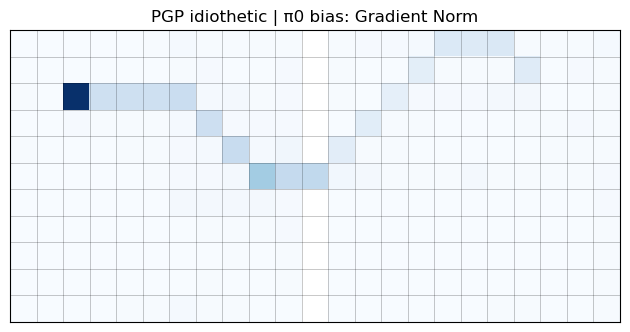

 Epoch #1 training 1250/5000, 


100%|██████████| 1250/1250 [05:49<00:00,  3.57it/s]


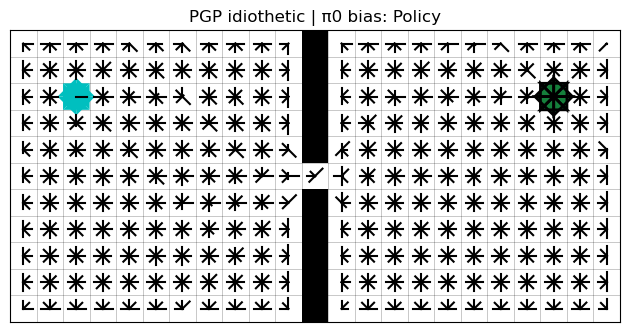

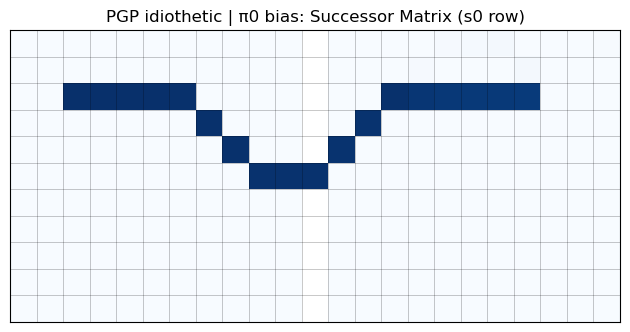

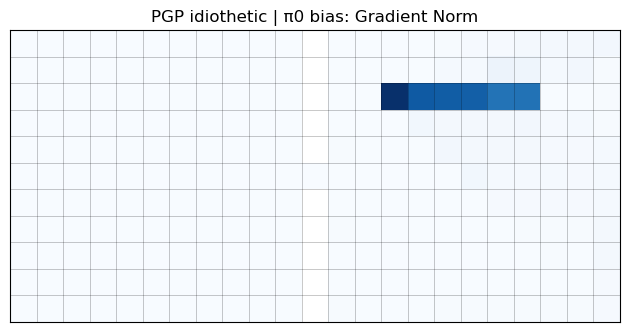

 Epoch #2 training 2500/5000, 


 34%|███▍      | 428/1250 [02:00<03:51,  3.55it/s]


KeyboardInterrupt: 

In [41]:
for e  in range(n_train_plots):

    for v in vs:
        print(" Epoch #{} training {}/{}, ".format(e, int(e*n_train_steps/n_train_plots), n_train_steps))
        v.agent.learn(alpha=alpha_train, n_steps=int(n_train_steps / n_train_plots), keep_history=True)

        v.plot_policy(plot_maze=True, plot_axis=False)
        plt.title("{}: Policy".format(v.agent.name))
        plt.tight_layout()
        plt.show()
        
        v.plot_successor_matrix(plot_axis=False)
        plt.title("{}: Successor Matrix (s0 row)".format(v.agent.name))
        plt.tight_layout()
        plt.show()

        v.plot_gradient_norm(plot_axis=False)
        plt.title("{}: Gradient Norm".format(v.agent.name))
        plt.tight_layout()
        plt.show()

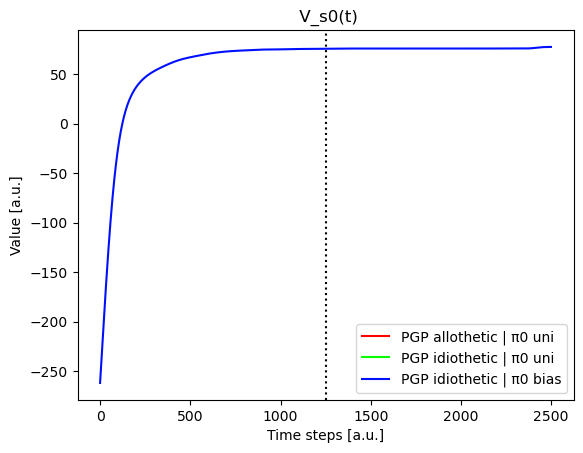

In [42]:
p.plotValue(normalize=False)

Moviepy - Building video PGP idiothetic | π0 bias_ss_tworooms_raw.mp4.
Moviepy - Writing video PGP idiothetic | π0 bias_ss_tworooms_raw.mp4



Moviepy - Done !
Moviepy - video ready PGP idiothetic | π0 bias_ss_tworooms_raw.mp4


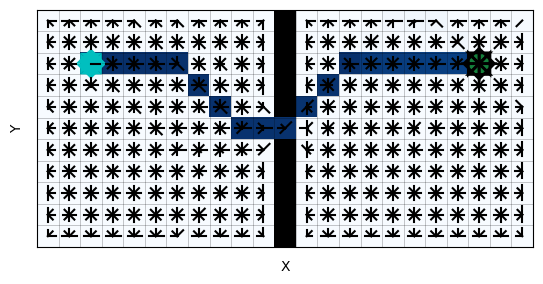

In [52]:
for v in vs:
    animation = GridWorldAnimator(v).animate_policy_sr(ts_interval=round(n_train_steps/n_frames), fps=20)   
    animation_id = "{}_ss_{}{}.mp4".format(v.agent.name, v.env.name, suffix)
    animation.write_videofile(animation_id, fps=20)
